# S&M Final Project

The goal of this project is to create projections for Canada's population based on census data from 1950 - 2022.

We start by importing the necessary libraries and dependencies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modsim import *

Next we wrangle the census data located in the .csv file into a pandas dataframe.

In [2]:
filename = 'canada-population-2023-04-02.csv'
df = pd.read_csv(filename)

df.head()

,Year,Pop,AGR
0,1950,13743069,1.44
1,1951,14085724,2.49
2,1952,14485745,2.84
3,1953,14901525,2.87
4,1954,15323201,2.83


 The data contains 3 columns: Year, Population and Annual Growth Rate. Now that our data is in a form where we are able to manipulate it we can create a simple model of Canada's population history over time.

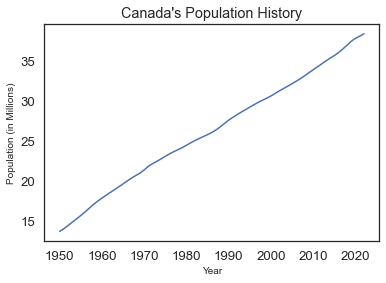

In [3]:
def plot_pop_census():
    plt.plot(df.Year,(df.Pop/1e6), label="Census Data")
    plt.xlabel("Year")
    plt.ylabel("Population (in Millions)")
    plt.title("Canada's Population History")

plot_pop_census()

This model gives us a basic idea of Canada's population growth over the past 70 years. However, in order to create accurate projections we want to use the annual growth rate. To get a good visualization of this data we should create a model of the annual growth rate over time.

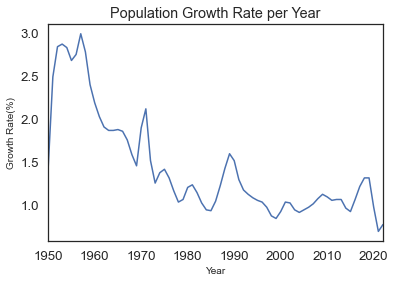

In [31]:
def plot_gr_census():
    plt.plot(df.Year,df.AGR, label="Census Growth Rate")
    plt.xlim(1950,2022)
    plt.xlabel("Year")
    plt.ylabel("Growth Rate(%)")
    plt.title("Population Growth Rate per Year")

plot_gr_census()

Now that we have a good visualization of how the annual growth rate has changed, we need to find the average rate at which this growth rate has changed over the course of the past 70 years. To do this we simply need to divide the AGR by the elapsed time (70 years).

In [13]:
t_0 = df.iloc[1,0]
t_end = df.iloc[71,0]

elapsed_time = t_end - t_0

g_0 = df.iloc[1,2]
g_end = df.iloc[71,2]

growth_rate = g_end - g_0

p_0 = df.iloc[1,1]
p_end = df.iloc[71,1]

AGR = p_end - p_0
pop_change = AGR / elapsed_time
print(pop_change)


growth_change = growth_rate / elapsed_time
print("Canada's growth rate changes by", growth_change,'%',"each year.")


343846.97142857144
Canada's growth rate changes by -0.025571428571428575 % each year.


Now that we have the average growth rate change we can create our own model of Canada's growth rate over time and compare it directly to our data.

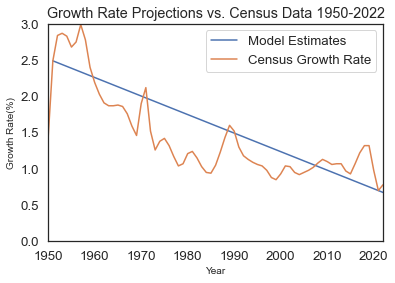

In [47]:
growth_results = TimeSeries()
growth_results[t_0] = g_0

for t in range(t_0, t_end+100):
    growth_results[t+1] = growth_results[t] + growth_change

def plot_growth_comparison():
    plt.plot(growth_results.index,growth_results, label="Model Estimates")
    plt.plot(df.Year,df.AGR, label="Census Growth Rate")
    plt.xlim(1950,2022)
    plt.ylim(0,3)
    plt.xlabel("Year")
    plt.ylabel("Growth Rate(%)")
    plt.title("Growth Rate Projections vs. Census Data 1950-2022")
    plt.legend()

plot_growth_comparison()

Although not a perfect fit, our model fits the data quite well and we can now choose to move forward with projections.



In [65]:
abs_error = abs(growth_results.values[0:73] - df.AGR)

max(abs_error)

1.0500000000000003

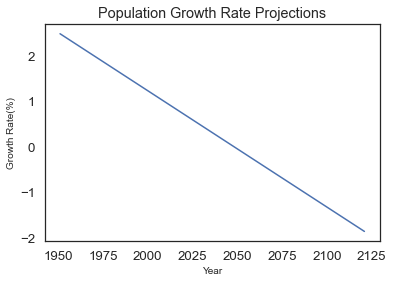

In [36]:
def plot_growth_estimates():
    plt.plot(growth_results.index,growth_results, label="Census Data")
    plt.xlabel("Year")
    plt.ylabel("Growth Rate(%)")
    plt.title("Population Growth Rate Projections")

plot_growth_estimates()

With these calculations the populationis predicted to stop growing and start decreasing by approximately 2035, this could easily change based on world events however these projections will follow the logic that Canada's growth rate will continue to change at the current average rate. 

Now that we have our own projections of Canada's population growth rate over time we can create our own population model as a function of the population multiplied by our projected growth rate over time. We can then compare this model to our data for the time period of 1950-2022.

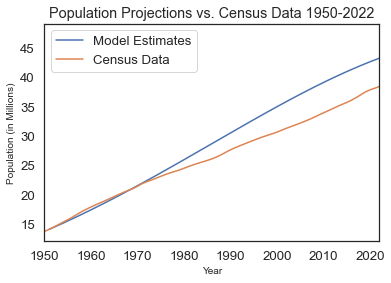

In [42]:
pop_results = TimeSeries()
pop_results[t_0] = p_0

for t in range(t_0, t_end+100):
    pop_results[t+1] = pop_results[t] + pop_results[t]*(growth_results[t]/100)
    

def plot_pop_estimates():
    plt.plot(pop_results.index,(pop_results/1e6))
    plt.xlim(2020,2122)
    plt.ylim(20,50)
    plt.xlabel("Year")
    plt.ylabel("Population (in Millions)")
    plt.title("Projected Population of Canada")

def plot_pop_comparison():
    plt.plot(pop_results.index,(pop_results/1e6), label="Model Estimates")
    plt.plot(df.Year,(df.Pop/1e6), label="Census Data")
    plt.xlim(1950,2022)
    plt.xlabel("Year")
    plt.ylabel("Population (in Millions)")
    plt.title("Population Projections vs. Census Data 1950-2022")
    plt.legend()

plot_pop_comparison()

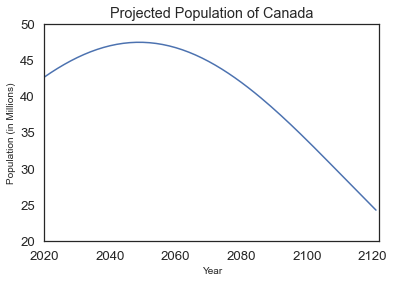

In [43]:
plot_pop_estimates()